# Here we are classifing using classifier  models from Descriptors v-1
<!-- # Here we are predicting using Regression  models from Fingure print  v-2 -->


## Installation

In [1]:
# Install RDKit.
# %%capture
# !pip install rdkit-pypi

In [2]:
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-12-10 13:41:37--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-12-10 13:41:37--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.4’

padel.zip.4         100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2021-12-10 13:41:37 (179 MB/s) - ‘padel.zip.4’ saved [25768637/25768637]

--2021-12-10 13:41:37--  https://gi

In [3]:
# ! pip install chembl_webresource_client

  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires PyYAML==5.3.1, but you have pyyaml 6.0 which is incompatible.


In [4]:
# !pip install lazypredict

  Using cached PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests-cache 0.7.5 requires pyyaml>=5.4, but you have pyyaml 5.3.1 which is incompatible.


In [95]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 36.7 MB/s 


# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


import sweetviz as sv
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from chembl_webresource_client.new_client import new_client as n_c

# Plot settings

In [2]:
sns.set(style='ticks')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 23
plt.rcParams['figure.titlesize'] = 26
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size'] = 5
sns.set_style('ticks')

**Kv1. 3 channel blockers have been found to alleviate disease symptoms in animal autoimmune diseases, chronic inflammatory diseases, and metabolic disease models without obvious side effects (Perez-Verdaguer et al., 2016).**

In [3]:
# Target search for KV1.3 Blockers
target = n_c.target
target_query = target.search('KCNA3') #KCNA3 is a gene
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P16390', 'xref_name': None, 'xre...",Mus musculus,Voltage-gated potassium channel subunit Kv1.3,14.0,False,CHEMBL4818,"[{'accession': 'P16390', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'P22001', 'xref_name': None, 'xre...",Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,12.0,False,CHEMBL4633,"[{'accession': 'P22001', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P15384', 'xref_name': None, 'xre...",Rattus norvegicus,Voltage-gated potassium channel subunit Kv1.3,12.0,False,CHEMBL4248,"[{'accession': 'P15384', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Homo sapiens,Voltage-gated potassium channel,1.0,False,CHEMBL2362996,"[{'accession': 'P51787', 'component_descriptio...",PROTEIN FAMILY,9606


# *Select and retrieve bioactivity data for Homo sapiens  (2nd entry)* 

In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL4633'

In [104]:
activity = n_c.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [105]:
# convert dictionary to pandas data frame
df = pd.DataFrame.from_dict(res)

In [106]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,239620,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.73', 'le': '0.24', 'lle': '-1.45',...",CHEMBL421891,None,CHEMBL421891,5.01,False,http://www.openphacts.org/units/Nanomolar,208911,=,1,True,=,None,IC50,nM,None,9700.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,9.7
1,None,241014,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.49', 'le': '0.24', 'lle': '-1.75',...",CHEMBL111539,None,CHEMBL111539,5.10,False,http://www.openphacts.org/units/Nanomolar,208912,=,1,True,=,None,IC50,nM,None,8000.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,242254,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.68', 'le': '0.26', 'lle': '-1.68',...",CHEMBL109336,None,CHEMBL109336,5.43,False,http://www.openphacts.org/units/Nanomolar,208920,=,1,True,=,None,IC50,nM,None,3700.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.7
3,None,243680,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '14.09', 'le': '0.27', 'lle': '-0.91',...",CHEMBL418444,None,CHEMBL418444,5.50,False,http://www.openphacts.org/units/Nanomolar,208919,=,1,True,=,None,IC50,nM,None,3200.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.2
4,None,243681,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '13.23', 'le': '0.25', 'lle': '0.97', ...",CHEMBL109739,None,CHEMBL109739,5.41,False,http://www.openphacts.org/units/Nanomolar,208917,=,1,True,=,None,IC50,nM,None,3900.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,None,18519019,[],CHEMBL4193569,Inhibition of human Kv1.3 expressed in CHO cel...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,None,None,CHEMBL4190320,Eur J Med Chem,2017,None,CHEMBL4207090,None,CHEMBL4207090,None,False,http://www.openphacts.org/units/Nanomolar,3074923,>,1,True,>,None,IC50,nM,None,30000.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,30.0
885,None,18519020,[

In [107]:
#Saved the pd database as CSV format
df.to_csv('KV1.3_01_bioactivity_data_raw.csv', index=False)

#2. Preprocess

### a. Handle missing **values**
*If* any compounds has missing value for the standard_value and canonical_smiles then that column is dropped .

In [108]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,239620,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.73', 'le': '0.24', 'lle': '-1.45',...",CHEMBL421891,None,CHEMBL421891,5.01,False,http://www.openphacts.org/units/Nanomolar,208911,=,1,True,=,None,IC50,nM,None,9700.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,9.7
1,None,241014,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.49', 'le': '0.24', 'lle': '-1.75',...",CHEMBL111539,None,CHEMBL111539,5.10,False,http://www.openphacts.org/units/Nanomolar,208912,=,1,True,=,None,IC50,nM,None,8000.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,242254,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.68', 'le': '0.26', 'lle': '-1.68',...",CHEMBL109336,None,CHEMBL109336,5.43,False,http://www.openphacts.org/units/Nanomolar,208920,=,1,True,=,None,IC50,nM,None,3700.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.7
3,None,243680,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '14.09', 'le': '0.27', 'lle': '-0.91',...",CHEMBL418444,None,CHEMBL418444,5.50,False,http://www.openphacts.org/units/Nanomolar,208919,=,1,True,=,None,IC50,nM,None,3200.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.2
4,None,243681,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '13.23', 'le': '0.25', 'lle': '0.97', ...",CHEMBL109739,None,CHEMBL109739,5.41,False,http://www.openphacts.org/units/Nanomolar,208917,=,1,True,=,None,IC50,nM,None,3900.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,None,18519019,[],CHEMBL4193569,Inhibition of human Kv1.3 expressed in CHO cel...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,None,None,CHEMBL4190320,Eur J Med Chem,2017,None,CHEMBL4207090,None,CHEMBL4207090,None,False,http://www.openphacts.org/units/Nanomolar,3074923,>,1,True,>,None,IC50,nM,None,30000.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,30.0
885,None,18519020,[

*Here are we are considering Standard type = IC50 and the standard value means potency of the drug. Lower the number the better the potency of the drug becomes*


> 




we can also say lower potency means we need lower concentration of the drug 

In [109]:
# checking the unique smiles values
len(df2.canonical_smiles.unique())

511

In [110]:
# dropping the duplicates
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,239620,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.73', 'le': '0.24', 'lle': '-1.45',...",CHEMBL421891,None,CHEMBL421891,5.01,False,http://www.openphacts.org/units/Nanomolar,208911,=,1,True,=,None,IC50,nM,None,9700.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,9.7
1,None,241014,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.49', 'le': '0.24', 'lle': '-1.75',...",CHEMBL111539,None,CHEMBL111539,5.10,False,http://www.openphacts.org/units/Nanomolar,208912,=,1,True,=,None,IC50,nM,None,8000.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,242254,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '12.68', 'le': '0.26', 'lle': '-1.68',...",CHEMBL109336,None,CHEMBL109336,5.43,False,http://www.openphacts.org/units/Nanomolar,208920,=,1,True,=,None,IC50,nM,None,3700.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.7
3,None,243680,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '14.09', 'le': '0.27', 'lle': '-0.91',...",CHEMBL418444,None,CHEMBL418444,5.50,False,http://www.openphacts.org/units/Nanomolar,208919,=,1,True,=,None,IC50,nM,None,3200.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.2
4,None,243681,[],CHEMBL819401,Displacement of [125I]- ChTX from human T cell...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,None,None,CHEMBL1131887,Bioorg. Med. Chem. Lett.,1999,"{'bei': '13.23', 'le': '0.25', 'lle': '0.97', ...",CHEMBL109739,None,CHEMBL109739,5.41,False,http://www.openphacts.org/units/Nanomolar,208917,=,1,True,=,None,IC50,nM,None,3900.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,None,18519018,[],CHEMBL4193569,Inhibition of human Kv1.3 expressed in CHO cel...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,None,None,CHEMBL4190320,Eur J Med Chem,2017,None,CHEMBL4208681,None,CHEMBL4208681,None,False,http://www.openphacts.org/units/Nanomolar,3074922,>,1,True,>,None,IC50,nM,None,30000.0,CHEMBL4633,Homo sapiens,Voltage-gated potassium channel subunit Kv1.3,9606,None,None,IC50,uM,UO_0000065,None,30.0
884,None,18519019,[],CHEMB

#Data pre-processing of the bioactivity data


*Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame*

In [111]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL421891,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,9700.0
1,CHEMBL111539,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,8000.0
2,CHEMBL109336,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,3700.0
3,CHEMBL418444,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,3200.0
4,CHEMBL109739,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,3900.0
...,...,...,...
883,CHEMBL4208681,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,30000.0
884,CHEMBL4207090,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,30000.0
885,CHEMBL4218820,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1,30000.0
886,CHEMBL4211453,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1,30000.0


In [112]:
#Saves dataframe to CSV file
df3.to_csv('KV1.3_02_bioactivity_data_preprocessed.csv', index=False)

#Labeling compounds as either being active, inactive or intermediate

*The bioactivity data is in the IC50 unit. **Compounds having values of less than 1000 nM will be considered to be active** while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate*

In [113]:
df4 = pd.read_csv('KV1.3_02_bioactivity_data_preprocessed.csv')

### Curation

In [114]:
# based on the above mention threshold labeling is done
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [115]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL421891,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,9700.0,intermediate
1,CHEMBL111539,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,8000.0,intermediate
2,CHEMBL109336,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,3700.0,intermediate
3,CHEMBL418444,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,3200.0,intermediate
4,CHEMBL109739,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,3900.0,intermediate
...,...,...,...,...
506,CHEMBL4208681,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,30000.0,inactive
507,CHEMBL4207090,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,30000.0,inactive
508,CHEMBL4218820,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1,30000.0,inactive
509,CHEMBL4211453,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1,30000.0,inactive


In [116]:
#curated data is save as csv
df5.to_csv('KV1.3_03_bioactivity_data_curated.csv', index=False)

SAVING THE DATA on the local disc && ZIP the file

In [117]:
df_curated = pd.read_csv('KV1.3_03_bioactivity_data_curated.csv')


In [118]:
df_curated_no_smiles = df_curated.drop(columns='canonical_smiles')

In [119]:
smiles = []

for i in df_curated.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [120]:
df_clean_smiles = pd.concat([df_curated_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL421891,9700.0,intermediate,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1
1,CHEMBL111539,8000.0,intermediate,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1
2,CHEMBL109336,3700.0,intermediate,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...
3,CHEMBL418444,3200.0,intermediate,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1
4,CHEMBL109739,3900.0,intermediate,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...
...,...,...,...,...
506,CHEMBL4208681,30000.0,inactive,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1
507,CHEMBL4207090,30000.0,inactive,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1
508,CHEMBL4218820,30000.0,inactive,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1
509,CHEMBL4211453,30000.0,inactive,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1


# Calculate Lipinski descriptors


Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:



*  Molecular weight < 500 Dalton
*  Octanol-water partition coefficient (LogP) < 5
*  Hydrogen bond donors < 5
*  Hydrogen bond acceptors < 10
>
Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation


In [127]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

'''
function to estimate molecule Lipinski descriptors

'''

# def lipinski(smiles, verbose=False):
#     moldata= []
#     problematic_smiles=[]
#     for i,elem in enumerate(smiles):
#         try:
#             mol=Chem.MolFromSmiles(elem) 
#             mol = rdMolStandardize.Cleanup(mol)
#             moldata.append(mol)  
#         except:
#             problematic_smiles.append(i)
#             pass
#     baseData= np.arange(1,1)
#     i=0  
#     for mol in moldata:        
#         desc_MolWt = Descriptors.MolWt(mol)
#         desc_MolLogP = Descriptors.MolLogP(mol)
#         desc_NumHDonors = Lipinski.NumHDonors(mol)
#         desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
#         row = np.array([desc_MolWt,
#                         desc_MolLogP,
#                         desc_NumHDonors,
#                         desc_NumHAcceptors])   
    
#         if(i==0):
#             baseData=row
#         else:
#             baseData=np.vstack([baseData, row])
#         i=i+1      
    
#     columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
#     descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
#     return  descriptors,problematic_smiles

'\nfunction to estimate molecule Lipinski descriptors\n\n'

In [128]:
df_clean_smiles.canonical_smiles

0       CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1
1        CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1
2      CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...
3         CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1
4      N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...
                             ...                        
506                    Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1
507             Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1
508               Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1
509                  Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1
510        COc1ccc2[nH]c(C(=O)NC/C=C/c3c[nH]c(N)n3)cc2c1
Name: canonical_smiles, Length: 511, dtype: object

In [130]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

In [131]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,393.889,6.45630,1.0,1.0
1,407.916,6.84640,1.0,1.0
2,428.334,7.10810,1.0,1.0
3,389.926,6.40270,1.0,1.0
4,408.864,4.44437,4.0,2.0
...,...,...,...,...
506,249.318,0.12090,4.0,4.0
507,391.067,2.20760,4.0,3.0
508,283.335,1.83580,4.0,3.0
509,285.351,1.07750,4.0,4.0


In [132]:
df_combined = pd.concat([df_curated,df_lipinski], axis=1)


In [133]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL421891,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,9700.0,intermediate,393.889,6.45630,1.0,1.0
1,CHEMBL111539,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,8000.0,intermediate,407.916,6.84640,1.0,1.0
2,CHEMBL109336,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,3700.0,intermediate,428.334,7.10810,1.0,1.0
3,CHEMBL418444,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,3200.0,intermediate,389.926,6.40270,1.0,1.0
4,CHEMBL109739,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,3900.0,intermediate,408.864,4.44437,4.0,2.0
...,...,...,...,...,...,...,...,...
506,CHEMBL4208681,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,30000.0,inactive,249.318,0.12090,4.0,4.0
507,CHEMBL4207090,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,30000.0,inactive,391.067,2.20760,4.0,3.0
508,CHEMBL4218820,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1,30000.0,inactive,283.335,1.83580,4.0,3.0
509,CHEMBL4211453,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1,30000.0,inactive,285.351,1.07750,4.0,4.0


Convert IC50 to pIC50 To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).
>
This custom function pIC50() will accept a DataFrame as input and will:
>
Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9  Take the molar value and apply -log10 Delete the standard_value column and create a new pIC50 column

In [134]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [135]:
df_combined.standard_value.describe()


count       511.000000
mean       6045.764264
std       17502.407639
min           0.031000
25%           3.333000
50%         270.000000
75%        2770.000000
max      230000.000000
Name: standard_value, dtype: float64

In [136]:
# Normalize the value
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.


In [137]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL421891,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,intermediate,393.889,6.45630,1.0,1.0,9700.0
1,CHEMBL111539,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,intermediate,407.916,6.84640,1.0,1.0,8000.0
2,CHEMBL109336,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,intermediate,428.334,7.10810,1.0,1.0,3700.0
3,CHEMBL418444,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,intermediate,389.926,6.40270,1.0,1.0,3200.0
4,CHEMBL109739,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,intermediate,408.864,4.44437,4.0,2.0,3900.0
...,...,...,...,...,...,...,...,...
506,CHEMBL4208681,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,inactive,249.318,0.12090,4.0,4.0,30000.0
507,CHEMBL4207090,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,inactive,391.067,2.20760,4.0,3.0,30000.0
508,CHEMBL4218820,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1,inactive,283.335,1.83580,4.0,3.0,30000.0
509,CHEMBL4211453,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1,inactive,285.351,1.07750,4.0,4.0,30000.0


In [138]:
df_norm.standard_value_norm.describe()

count       511.000000
mean       6045.764264
std       17502.407639
min           0.031000
25%           3.333000
50%         270.000000
75%        2770.000000
max      230000.000000
Name: standard_value_norm, dtype: float64

In [139]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL421891,CCCNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(Cl)cc1,intermediate,393.889,6.45630,1.0,1.0,5.013228
1,CHEMBL111539,CCCCNC(=O)c1cc(/C=C/c2ccccc2F)ccc1-c1ccc(Cl)cc1,intermediate,407.916,6.84640,1.0,1.0,5.096910
2,CHEMBL109336,CC(C)NC(=O)c1cc(/C=C/c2ccc(Cl)c(F)c2)ccc1-c1cc...,intermediate,428.334,7.10810,1.0,1.0,5.431798
3,CHEMBL418444,CCNC(=O)c1cc(/C=C/CCc2ccccc2)ccc1-c1ccc(Cl)cc1,intermediate,389.926,6.40270,1.0,1.0,5.494850
4,CHEMBL109739,N=C(N)NNC(=O)c1cc(/C=C/c2ccc(F)cc2)ccc1-c1ccc(...,intermediate,408.864,4.44437,4.0,2.0,5.408935
...,...,...,...,...,...,...,...,...
506,CHEMBL4208681,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,inactive,249.318,0.12090,4.0,4.0,4.522879
507,CHEMBL4207090,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,inactive,391.067,2.20760,4.0,3.0,4.522879
508,CHEMBL4218820,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1,inactive,283.335,1.83580,4.0,3.0,4.522879
509,CHEMBL4211453,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1,inactive,285.351,1.07750,4.0,4.0,4.522879


In [140]:
df_final.pIC50.describe()

count    511.000000
mean       6.983986
std        1.849500
min        3.638272
25%        5.557532
50%        6.568636
75%        8.477165
max       10.508638
Name: pIC50, dtype: float64

In [141]:
df_final.to_csv('KV1.3_04_bioactivity_data_3class_pIC50.csv')

Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [142]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
6,CHEMBL281622,CCCCC/N=c1\ccn(Cc2ccccc2)c2ccccc12,active,304.437,4.7805,0.0,2.0,6.698970
11,CHEMBL112852,CC(C)NC(=O)c1cc(/C=C/c2cccc(Cl)c2)ccc1-c1ccc(C...,inactive,410.344,6.9690,1.0,1.0,4.995679
13,CHEMBL290227,C=C(C)O[C@H]1[C@@H](OC(C)=O)[C@H]2[C@@](C)(CC[...,active,770.869,4.3265,0.0,14.0,7.065502
14,CHEMBL55142,CCCCCCNc1cc[n+](-c2ccccc2)c2c(-c3ccccc3)cc(OC)...,active,411.569,6.7843,1.0,2.0,6.619789
15,CHEMBL55091,CCCC/N=c1\ccn(CCCc2ccccc2)c2cc(Cl)ccc12,active,352.909,5.6283,0.0,2.0,6.326979
...,...,...,...,...,...,...,...,...
506,CHEMBL4208681,Nc1nc(/C=C/CNC(=O)C2CCNCC2)c[nH]1,inactive,249.318,0.1209,4.0,4.0,4.522879
507,CHEMBL4207090,Nc1nc(CCCNC(=O)c2cc(Br)c(Br)[nH]2)c[nH]1,inactive,391.067,2.2076,4.0,3.0,4.522879
508,CHEMBL4218820,Nc1nc(CCCNC(=O)c2cc3ccccc3[nH]2)c[nH]1,inactive,283.335,1.8358,4.0,3.0,4.522879
509,CHEMBL4211453,Nc1nc(CCCNC(=O)C2Cc3ccccc3N2)c[nH]1,inactive,285.351,1.0775,4.0,4.0,4.522879


In [143]:
print("dimension of diabetes data: {}".format(df_2class.shape))

dimension of diabetes data: (412, 8)


Dataset is small and well labeled. There are no null values present.
very suitable to supervised machine learning formulation.
This is a binary classification problem, where we have 2 classes in the target (y) (i.e.'bioactivity_class') and the Lipinski Molecular descriptors (i.e. MW,LogP,NumHDonors and NumHAcceptors can be used as the feature (X).

In [145]:
selection = ['MW','LogP','NumHDonors','NumHAcceptors','class','pIC50']
df = df_2class[selection]

# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors Import library and statastical analysis

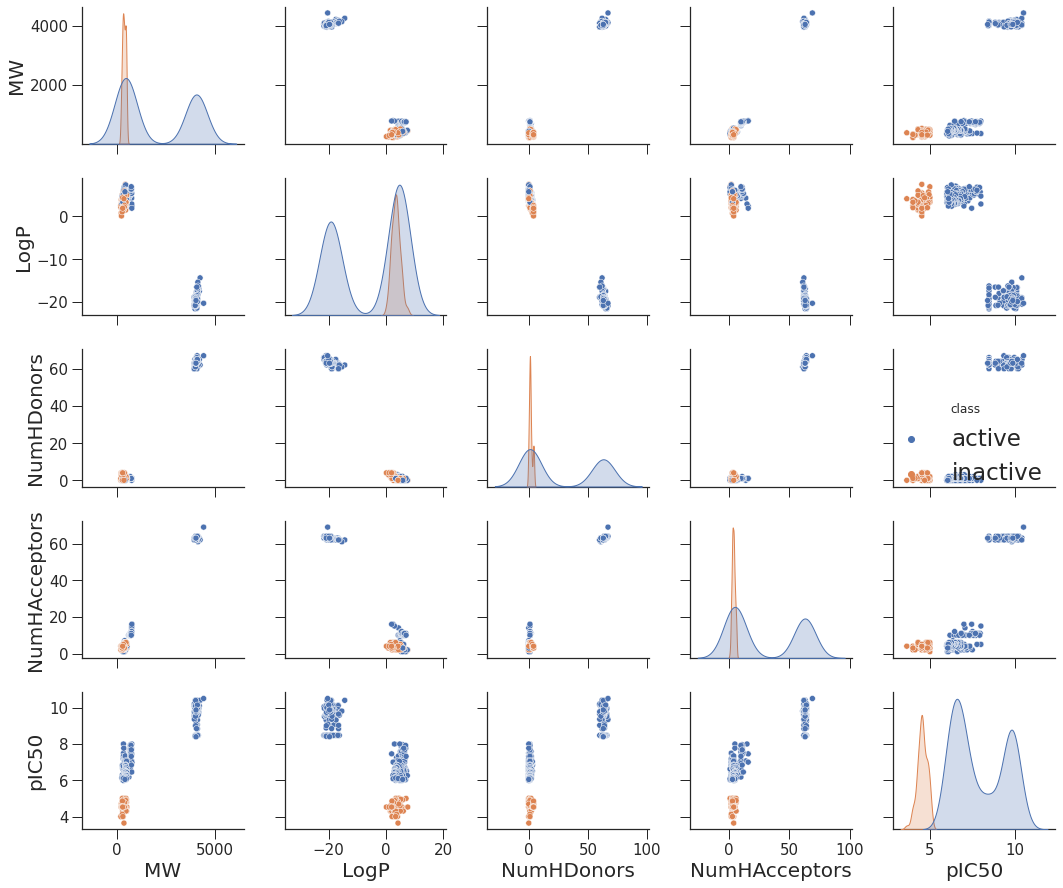

In [146]:
# selection = ['bioactivity_class','MW','LogP','NumHDonors','NumHAcceptors']
sns.pairplot(df[selection], hue='class')
plt.tight_layout()

## Boxplot of pIC50

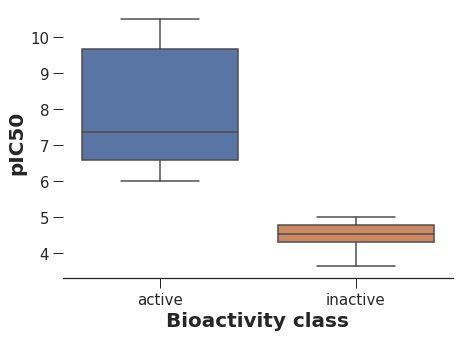

In [148]:
fig = plt.figure(figsize=(7,5))
sns.boxplot(x='class', y='pIC50', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('pIC50', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine(top=True, left=True)
plt.savefig('boxplot_pIC50.png',dpi=300);

# Boxplot of Lipinksi descriptors

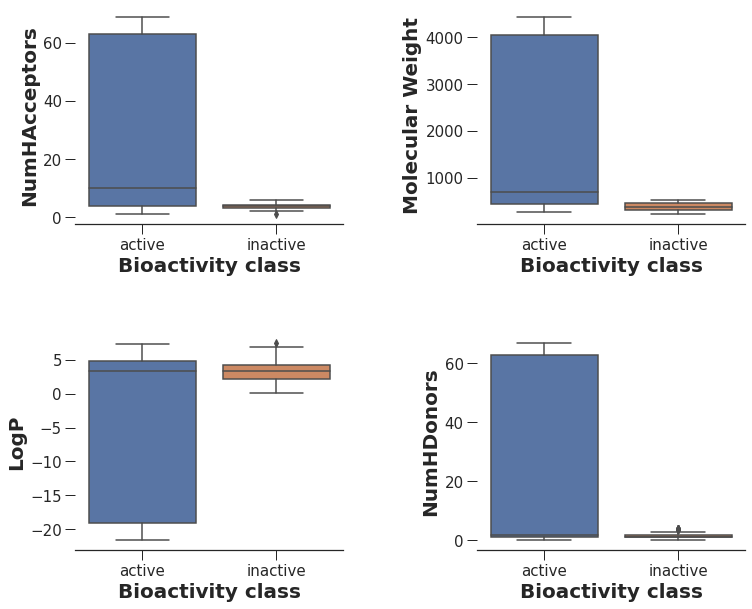

In [149]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
fig.add_subplot(2,2,1)
sns.boxplot(x='class', y='NumHAcceptors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHAcceptors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,2)
sns.boxplot(x='class', y='MW', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('Molecular Weight', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,3)
sns.boxplot(x='class', y='LogP', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('LogP', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

fig.add_subplot(2,2,4)
sns.boxplot(x='class', y='NumHDonors', data = df)
plt.xlabel('Bioactivity class', size=20, fontweight='bold')
plt.ylabel('NumHDonors', size=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)

sns.despine(top=True, left=True)
plt.savefig('boxplot_lipinksi_descriptors.png',dpi=300);

### Statistical analysis | Mann-Whitney U Test

In [152]:
from scipy.stats import mannwhitneyu

In [153]:
def mannwhitney_(active,inactive, descriptor):
  stat, p = mannwhitneyu(active,inactive)
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [154]:
for feature in selection[1:]: 
    results=mannwhitney_(df[df['class'] != 'inactive'][feature],
                df[df['class'] ==  'inactive'][feature],
                feature)
    display(results)

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,10665.5,0.04319,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,7925.5,8.287491e-07,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,5183.0,4.172607e-15,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,class,0.0,1.129098e-91,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,7.088413e-41,0.05,Different distribution (reject H0)


Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.


All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

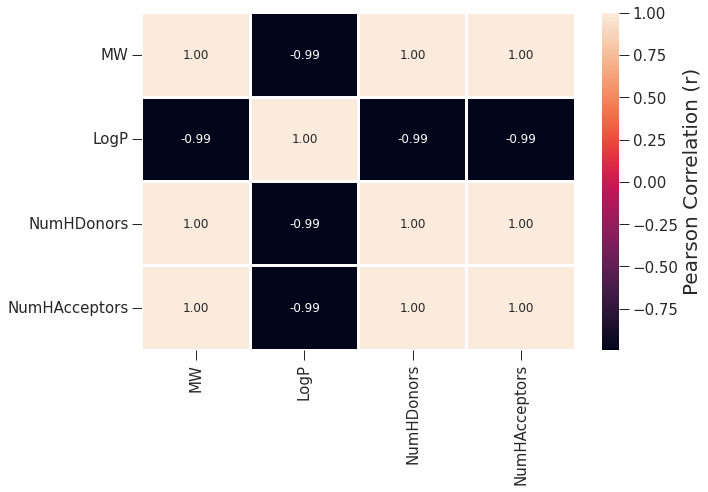

In [44]:
plt.figure(figsize=(10,7))
corr_mat = df.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=2, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15,rotation=0)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

**Frequency** plot of the 2 bioactivity classes


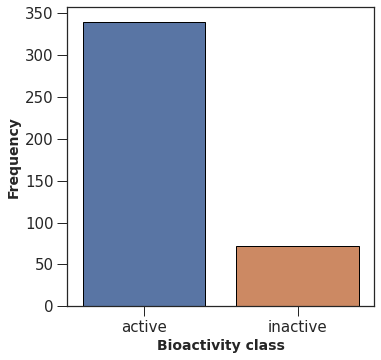

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

## Preparing data for machine learning

In [45]:
df['class'] = df['class'].map({'inactive':0, 'active':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
X = df.iloc[:,:-1].values   ##features selection
y = df.iloc[:,-1].values    ## target selection

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=27)

### It is importannt to use stratify inside train_test_split. It keeps the same distribution of target same within train and testing datasets. if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that random split has 40% of 0's and 60% of 1's

## Undersampling | TomekLinks

In [48]:
rs = SMOTE(sampling_strategy='auto')
X_train,y_train = rs.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


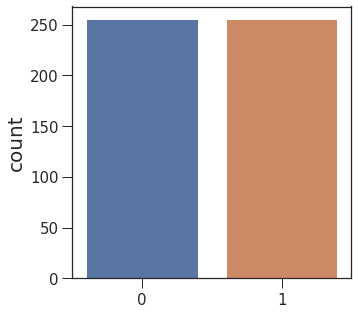

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(y_train)

# Machine learning Models

## k-Nearest Neighbors (KNN)

In [52]:
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

neighbors_settings = range(2,20)

for n_neighbors in neighbors_settings:
    print(f'working on neighbors {n_neighbors}')
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_train_pred=knn.predict(X_train)
    y_pred=knn.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

working on neighbors 2
working on neighbors 3
working on neighbors 4
working on neighbors 5
working on neighbors 6
working on neighbors 7
working on neighbors 8
working on neighbors 9
working on neighbors 10
working on neighbors 11
working on neighbors 12
working on neighbors 13
working on neighbors 14
working on neighbors 15
working on neighbors 16
working on neighbors 17
working on neighbors 18
working on neighbors 19


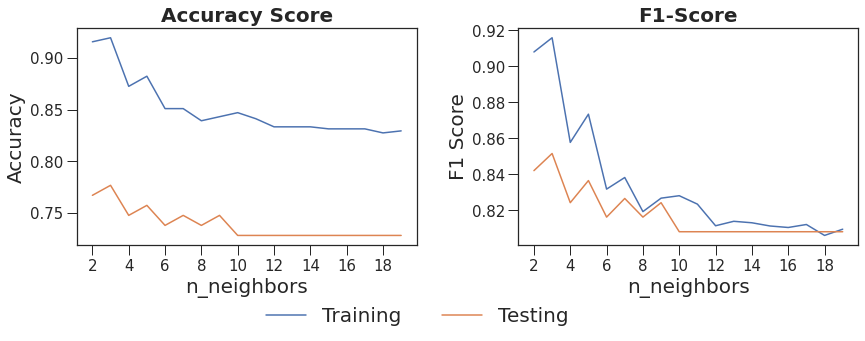

In [53]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xticks(range(2,20,2),size=15)
plt.yticks(size=15)
plt.xlabel('n_neighbors',size=20)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False, prop={'size':20})

fig.add_subplot(2,2,2)
plt.plot(neighbors_settings, training_f1)
plt.plot(neighbors_settings, test_f1)
plt.xticks(range(2,20,2),size=15)
plt.yticks(size=15)
plt.ylabel('F1 Score',size=20)
plt.xlabel('n_neighbors',size=20)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.2,-0.2), ncol=2, prop={'size':20});

Accuracy score, F1-score suggest that n_neighbors=5 is the optimum choice (by looking a testing accuracies).

In [54]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('F1-score of K-NN classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy of K-NN classifier on test set: 0.88
Accuracy of K-NN classifier on test set: 0.76
F1-score of K-NN classifier on test set: 0.84


### Confusion matrix

In [55]:
def normalized_confusion_matrix(y_test, conf_mat, model):
    _ , counts = np.unique(y_test,return_counts=True)
    conf_mat = (conf_mat.T/counts).T
    plt.figure(figsize=(6,5))
    ax=sns.heatmap(conf_mat,fmt='.2f',annot=True,annot_kws={'size':20},lw=2, cbar=True, cbar_kws={'label':'% Class accuracy'})
    plt.title(f'Confusion Matrix ({model})',size=22)
    plt.xticks(size=20)
    plt.yticks(size=20)
    ax.figure.axes[-1].yaxis.label.set_size(20) ##colorbar label
    cax = plt.gcf().axes[-1]  ##colorbar ticks
    cax.tick_params(labelsize=20) ## colorbar ticks
    plt.savefig(f'confusion-matrix-{model}.png',dpi=300)

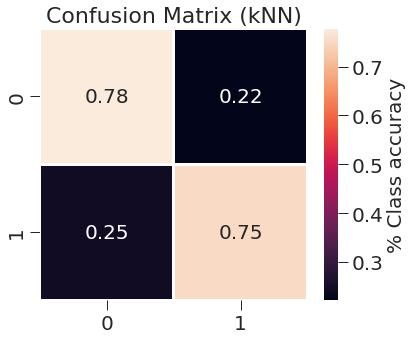

In [56]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat, 'kNN')

## K-fold cross validation

In [57]:
k_fold_knn_accuracy = cross_val_score(knn, X, y, cv=10) ##10-fold cross validation
k_fold_knn_f1 = cross_val_score(knn, X, y, cv=10,scoring='f1_weighted') ##10-fold cross validation

In [58]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_knn_accuracy.mean().round(2)} +/- {k_fold_knn_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_knn_f1.mean().round(2)} +/- {k_fold_knn_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.81 +/- 0.12
Average F1-score after 10 fold cross validation :0.8 +/- 0.11


## Logistic Regression

C : 1 Training set accuracy: 0.753
C : 1 Test set accuracy: 0.757
C : 1 Training set F1-score: 0.727
C : 1 Test set F1-score: 0.830


C : 0.01 Training set accuracy: 0.755
C : 0.01 Test set accuracy: 0.718
C : 0.01 Training set F1-score: 0.710
C : 0.01 Test set F1-score: 0.797


C : 100 Training set accuracy: 0.751
C : 100 Test set accuracy: 0.767
C : 100 Training set F1-score: 0.727
C : 100 Test set F1-score: 0.838




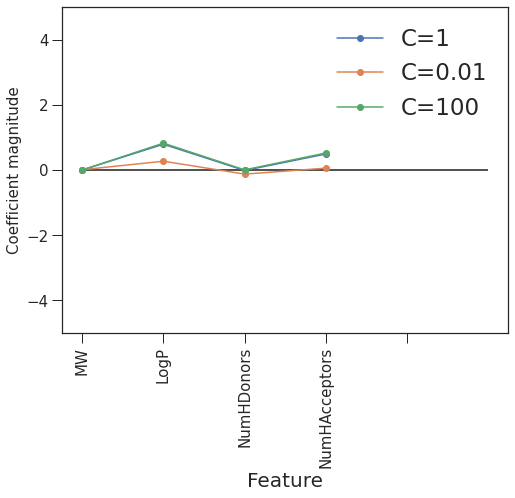

In [59]:
plt.figure(figsize=(8,6))
Clist=[1,0.01,100]

for C in Clist : 

    logreg = LogisticRegression(C=C,solver='newton-cg').fit(X_train, y_train) #keeping C=1 a
    y_train_pred = logreg.predict(X_train)
    y_pred = logreg.predict(X_test)

    print('C : {} Training set accuracy: {:.3f}'.format(C,accuracy_score(y_train, y_train_pred)))
    print('C : {} Test set accuracy: {:.3f}'.format(C,accuracy_score(y_test, y_pred)))

    print('C : {} Training set F1-score: {:.3f}'.format(C,f1_score(y_train, y_train_pred)))
    print('C : {} Test set F1-score: {:.3f}'.format(C, f1_score(y_test, y_pred)))
    print('\n')
    
    data_features = [x for i,x in enumerate(df.columns[:-1]) if i!=8]
    plt.plot(logreg.coef_.T, marker='o', label=f"C={C}")

plt.xticks(range(df.shape[1]), data_features, rotation=90)
plt.hlines(0, 0, df.shape[1])
plt.ylim(-5, 5)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Feature",size=20)
plt.ylabel("Coefficient magnitude",size=15)
plt.legend(frameon=False)

The default value of C=100 & C=1  0.01 provides the best result on test accuracy 

Stronger regularization (C=0.01) pushes coefficients more and more toward zero. Inspecting the plot more closely suggests that feature logP, for C=100, C=1 and C=0.001, the coefficient is positive. This indicates that high LogP feature is related to a sample beingdiabetes, regardless which model we look at.

## Confusion matrix

In [60]:
logreg = LogisticRegression(C=1,solver='newton-cg').fit(X_train,y_train)
y_pred=logreg.predict(X_test)

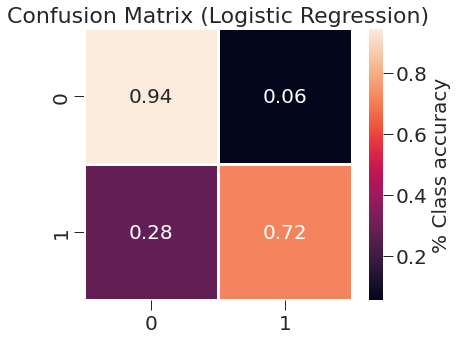

In [61]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Logistic Regression')

### K-fold cross validation

In [62]:
k_fold_logreg_accuracy = cross_val_score(logreg, X, y, cv=10) ##10-fold cross validation
k_fold_logreg_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation
print(f'Average accuracy after 10 fold cross validation :{k_fold_logreg_accuracy.mean().round(2)} +/- {k_fold_logreg_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_logreg_f1.mean().round(2)} +/- {k_fold_logreg_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.87 +/- 0.08
Average F1-score after 10 fold cross validation :0.85 +/- 0.09


## Decision Tree

In [63]:
max_depth=range(1,20)
training_accuracy = [] 
test_accuracy = []
training_f1 = []
test_f1 = []

for depth in max_depth : 
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth, min_samples_leaf=1).fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_pred = tree.predict(X_test)
    
    training_accuracy.append(accuracy_score(y_train,y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_pred))
    
    training_f1.append(f1_score(y_train,y_train_pred))
    test_f1.append(f1_score(y_test, y_pred))

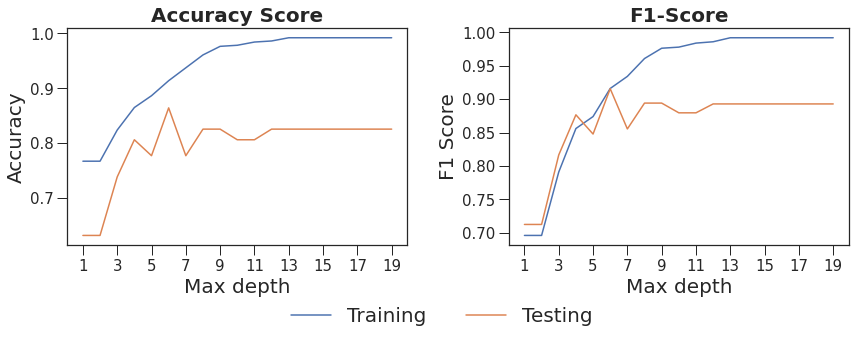

In [64]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.add_subplot(2,2,1)
plt.plot(max_depth, training_accuracy, label='training accuracy')
plt.plot(max_depth, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(range(1,20,2),size=15)
plt.yticks(size=15)
plt.title('Accuracy Score',size=20, weight='bold')
plt.legend([],frameon=False)

fig.add_subplot(2,2,2)
plt.plot(max_depth, training_f1)
plt.plot(max_depth, test_f1)
plt.ylabel('F1 Score',size=20)
plt.xlabel('Max depth',size=20)
plt.xticks(range(1,20,2),size=15)
plt.yticks(size=15)
plt.title('F1-Score',size=20,weight='bold')
plt.legend(['Training','Testing'],frameon=False, bbox_to_anchor=(0.3,-0.2), prop = {'size':20}, ncol=2);

The training accuracy on the after training set is 100%, while the test set accuracy is much worse. This means tree is overfitting and not generalizing well to new data. We set max_depth=9, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [65]:
tree = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1, random_state=0).fit(X_train, y_train)
y_pred=tree.predict(X_test)

In [66]:
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.825
F1-score on test set: 0.894


## Confusion matrix

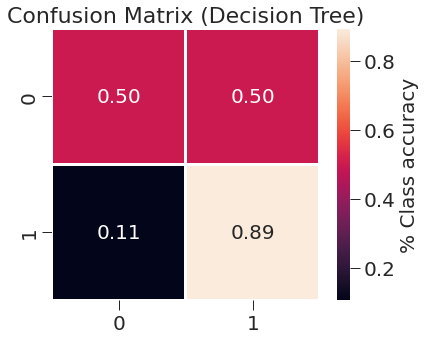

In [67]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Decision Tree')

### K-fold cross validation

In [68]:
k_fold_tree_accuracy = cross_val_score(tree, X, y, cv=10) ##10-fold cross validation
k_fold_tree_f1 = cross_val_score(tree, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [69]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.76 +/- 0.2
Average F1-score after 10 fold cross validation :0.76 +/- 0.18


### Feature importance in Decision trees

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1

 0 means “not used at all” 
 1 means “perfectly predicts the target”

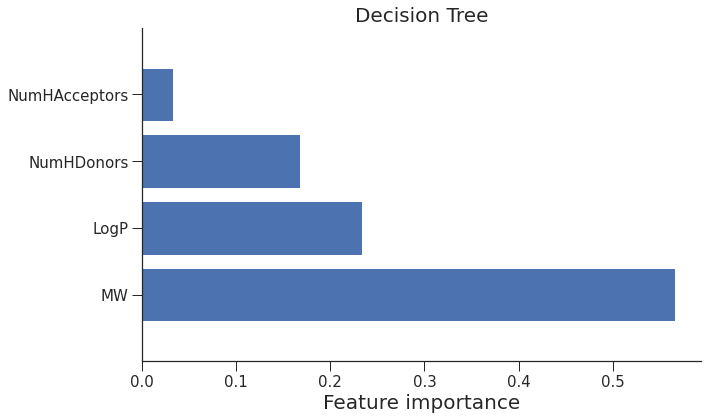

In [70]:
def plot_feature_importances(model, figure):
    n_features = 4
    plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features,size=15)
    plt.xticks(size=15)
    plt.xlabel('Feature importance',size=20,)
    #plt.ylabel('Feature',size=20)
    plt.ylim(-1, n_features)
    sns.despine(top=True)
    plt.title(f'{figure}',size=20)
    plt.tight_layout()
    plt.savefig(f'feature-image{figure}.png',dpi=300)

plot_feature_importances(tree,'Decision Tree')

Feature MW is the most important feature.

## Random Forest

In [71]:
rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [72]:

print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on test: 0.883
F1-score on test set: 0.931


 The default parameters of the random forest work well. This conclusion is derived after trying various values of  `max_depth` and `n_estimators`.

### Feature importance in Random Forest

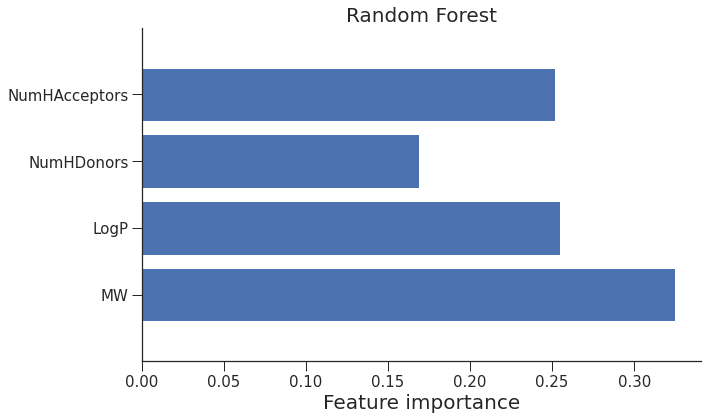

In [73]:
plot_feature_importances(rf, 'Random Forest')

Similarly to the single decision tree, the random forest also gives a lot of importance to the NumHAcceptors feature and it also chooses MW to be the 2nd most informative feature.

## Confusion matrix

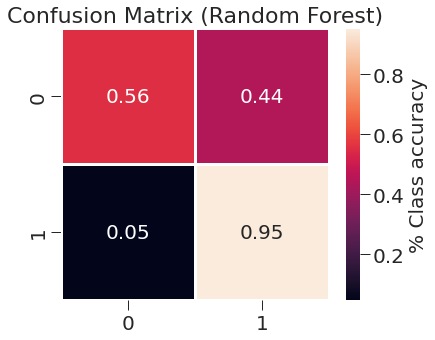

In [74]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Random Forest')

### K-fold cross-validation

In [75]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=10) ##10-fold cross validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [76]:
print(f'Average accuracy after 10 fold cross validation :{k_fold_tree_accuracy.mean().round(2)} +/- {k_fold_tree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_tree_f1.mean().round(2)} +/- {k_fold_tree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.76 +/- 0.2
Average F1-score after 10 fold cross validation :0.76 +/- 0.18


## Gradient Boosting

In [77]:
gb = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_pred=gb.predict(X_test)

In [78]:
print("Accuracy on train: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.978
Accuracy on test: 0.893
F1-score on test set: 0.936


Default values result in overfitting. Therefore, max_depth = 1 and learning_rate = 0.01 is chosen which reduces the gap between training and test accuracy.

### Feature importance in Gradient Boosting

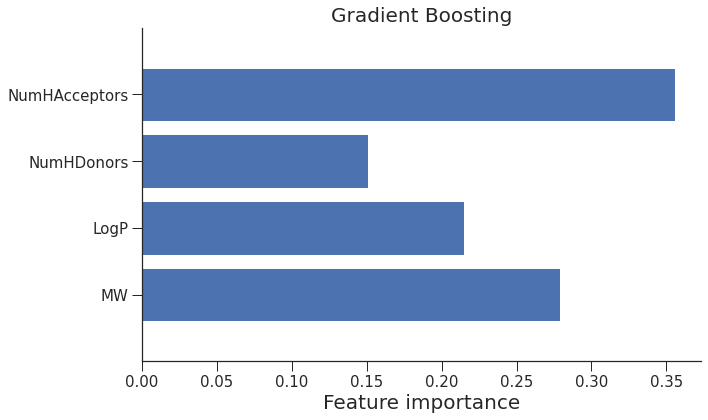

In [79]:
plot_feature_importances(gb, 'Gradient Boosting')

Gradient Boosting gives the most importance to NumHAcceptor and again 2nd best is MW.

##Confusion matrix

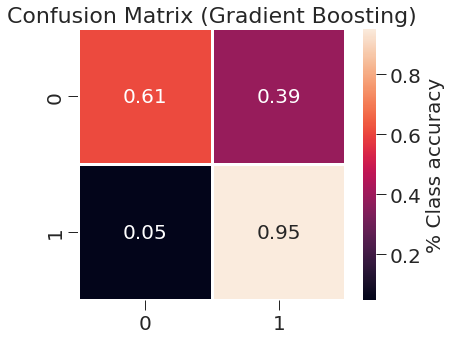

In [80]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Gradient Boosting')

### K-fold cross-validation

In [81]:
k_fold_gb_accuracy = cross_val_score(gb, X, y, cv=10) ##10-fold cross validation
k_fold_gb_f1 = cross_val_score(gb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation
print(f'Average accuracy after 10 fold cross validation :{k_fold_gb_accuracy.mean().round(2)} +/- {k_fold_gb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_gb_f1.mean().round(2)} +/- {k_fold_gb_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.79 +/- 0.18
Average F1-score after 10 fold cross validation :0.79 +/- 0.16


Scatter plot of MW versus LogP It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

## Support Vector Machine (SVM)

In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#SVM requiest feature scaling
svc = SVC().fit(X_train_scaled, y_train)
y_pred=svc.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.765
Accuracy on test: 0.631
F1-score on test set: 0.712


### Confusion matrix

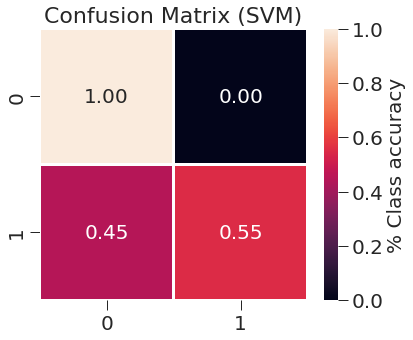

In [83]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'SVM')

### K-fold cross-validation

In [84]:
k_fold_svm_accuracy = cross_val_score(svc, scaler.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_svm_f1 = cross_val_score(svc, scaler.fit_transform(X), y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [85]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_svm_accuracy.mean().round(2)} +/- {k_fold_svm_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_svm_f1.mean().round(2)} +/- {k_fold_svm_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.83 +/- 0.01
Average F1-score after 10 fold cross validation : 0.75 +/- 0.01


## Neural Networks

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0,max_iter=2000).fit(X_train_scaled, y_train)
y_pred=mlp.predict(X_test_scaled)

print("Accuracy on train: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.755
Accuracy on test: 0.631
F1-score on test set: 0.712


### Confusion matrix

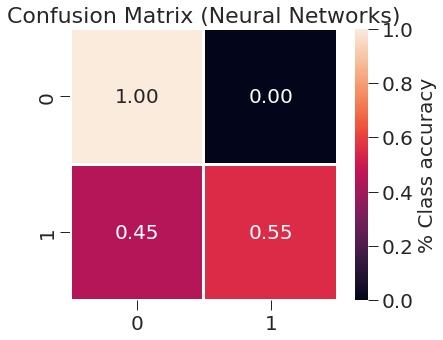

In [88]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'Neural Networks')

### K-fold cross-validation

In [89]:
k_fold_mlp_accuracy = cross_val_score(mlp, scaler.fit_transform(X), y, cv=10) ##10-fold cross validation
k_fold_mlp_f1 = cross_val_score(mlp, scaler.fit_transform(X), y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [90]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_mlp_accuracy.mean().round(2)} +/- {k_fold_mlp_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_mlp_f1.mean().round(2)} +/- {k_fold_mlp_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.88 +/- 0.06
Average F1-score after 10 fold cross validation : 0.84 +/- 0.08


# XGBoost





In [91]:
xgb = XGBClassifier().fit(X_train,y_train)

y_pred=xgb.predict(X_test)

print("Accuracy on train: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(xgb.score(X_test, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test)))

Accuracy on train: 0.992
Accuracy on test: 0.874
F1-score on test set: 0.926


## Confusion matrix

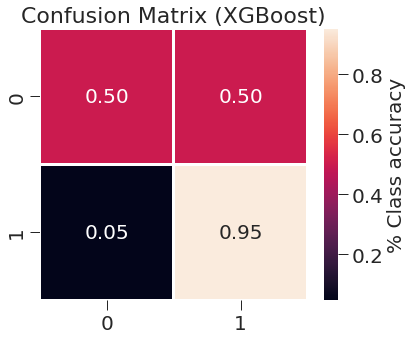

In [92]:
conf_mat = confusion_matrix(y_test,y_pred)
normalized_confusion_matrix(y_test,conf_mat,'XGBoost')

### K-fold cross-validation

In [93]:
k_fold_xgb_accuracy = cross_val_score(xgb, X, y, cv=10) ##10-fold cross validation
k_fold_xgb_f1 = cross_val_score(xgb, X, y, cv=10, scoring='f1_weighted') ##10-fold cross validation

In [94]:
print(f'Average accuracy after 10 fold cross validation : {k_fold_xgb_accuracy.mean().round(2)} +/- {k_fold_xgb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_xgb_f1.mean().round(2)} +/- {k_fold_xgb_f1.std().round(2)}')

Average accuracy after 10 fold cross validation : 0.77 +/- 0.18
Average F1-score after 10 fold cross validation : 0.77 +/- 0.16


### Feature importance in XGBoost

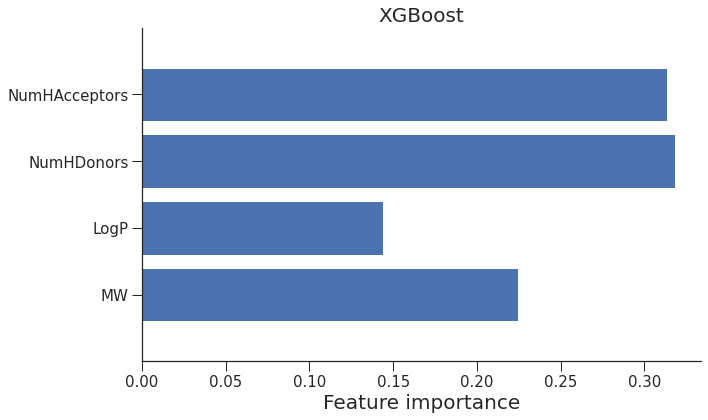

In [95]:
plot_feature_importances(xgb, 'XGBoost')

# Model comparision


In [96]:
all_accuracies = [k_fold_knn_accuracy.mean().round(2),
                   k_fold_logreg_accuracy.mean().round(2),
                   k_fold_tree_accuracy.mean().round(2),
                   k_fold_rf_accuracy.mean().round(2),
                   k_fold_gb_accuracy.mean().round(2),
                   k_fold_svm_accuracy.mean().round(2),
                   k_fold_mlp_accuracy.mean().round(2),
                   k_fold_xgb_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_knn_accuracy.std().round(2),
                   k_fold_logreg_accuracy.std().round(2),
                   k_fold_tree_accuracy.std().round(2),
                   k_fold_rf_accuracy.std().round(2),
                   k_fold_gb_accuracy.std().round(2),
                   k_fold_svm_accuracy.std().round(2),
                   k_fold_mlp_accuracy.std().round(2),
                   k_fold_xgb_accuracy.std().round(2)]

In [97]:
all_f1 = [k_fold_knn_f1.mean().round(2),
                   k_fold_logreg_f1.mean().round(2),
                   k_fold_tree_f1.mean().round(2),
                   k_fold_rf_f1.mean().round(2),
                   k_fold_gb_f1.mean().round(2),
                   k_fold_svm_f1.mean().round(2),
                   k_fold_mlp_f1.mean().round(2),
                   k_fold_xgb_f1.mean().round(2)]

all_f1_errors = [k_fold_knn_f1.std().round(2),
                   k_fold_logreg_f1.std().round(2),
                   k_fold_tree_f1.std().round(2),
                   k_fold_rf_f1.std().round(2),
                   k_fold_gb_f1.std().round(2),
                   k_fold_svm_f1.std().round(2),
                   k_fold_mlp_f1.std().round(2),
                   k_fold_xgb_f1.std().round(2)]

In [98]:
models=['kNN','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','SVM','Neural Networks', 'XGBoost']

In [99]:
model_data = pd.DataFrame([all_accuracies,all_accuracies_errors,all_f1,all_f1_errors],columns=models, index = ['Accuracy','STD_acc','F1-macro','STD_f1']).T

In [100]:
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,STD_acc,F1-macro,STD_f1
kNN,0.810000,0.120000,0.800000,0.110000
Logistic Regression,0.870000,0.080000,0.850000,0.090000
Decision Tree,0.760000,0.200000,0.760000,0.180000
Random Forest,0.810000,0.120000,0.810000,0.110000
Gradient Boosting,0.790000,0.180000,0.790000,0.160000
SVM,0.830000,0.010000,0.750000,0.010000
Neural Networks,0.880000,0.060000,0.840000,0.080000
XGBoost,0.770000,0.180000,0.770000,0.160000


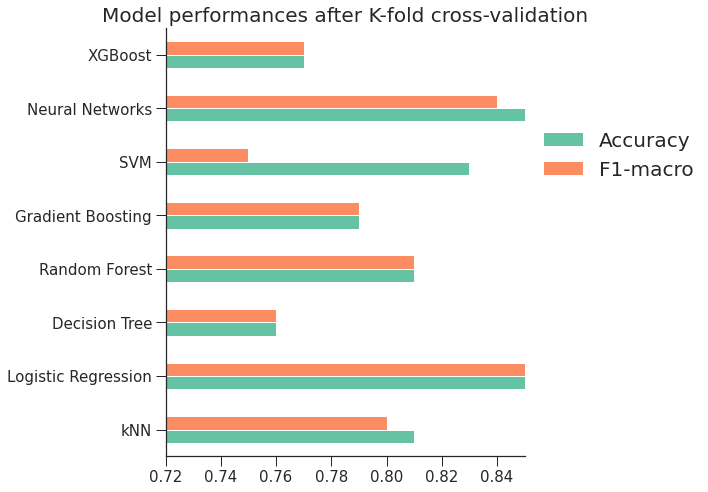

In [101]:
color=sns.color_palette('Set2')
model_data[['Accuracy','F1-macro']].plot.barh(figsize=(10,7),color=color)
plt.legend(frameon=False,bbox_to_anchor=(1,0.8), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.72,0.85]);
plt.title('Model performances after K-fold cross-validation',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('model-comparision.png',dpi=300)

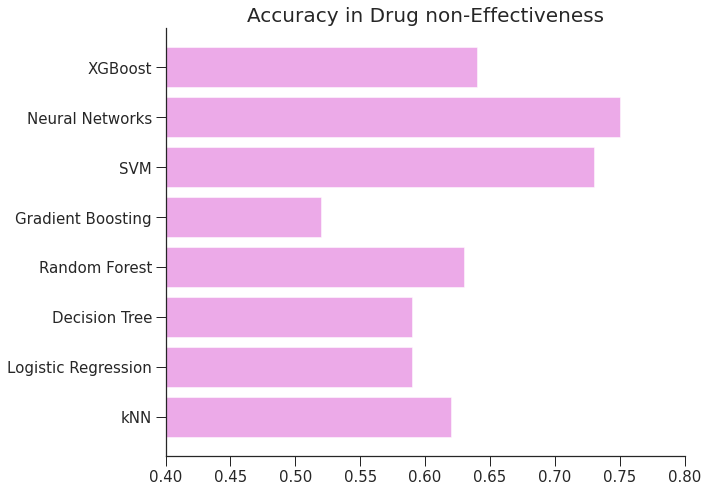

In [102]:
color=sns.color_palette('hls')
plt.figure(figsize=(10,7))
drug_accuracy = [0.62, 0.59, 0.59, 0.63, 0.52, 0.73, 0.75, 0.64]
plt.barh(models,drug_accuracy,alpha=0.5, color=color[5])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.4,0.8])
plt.title('Accuracy in Drug non-Effectiveness',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('drug-noneffectiveness.png',dpi=300)

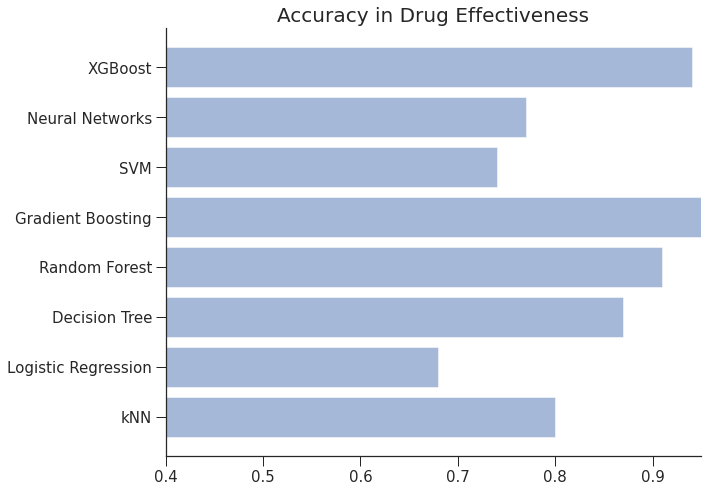

In [103]:
plt.figure(figsize=(10,7))
drug_accuracy = [0.80, 0.68, 0.87, 0.91, 0.95, 0.74, 0.77, 0.94]
plt.barh(models,drug_accuracy,alpha=0.5)
plt.xlim([0.4,0.95])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Accuracy in Drug Effectiveness',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('drug-effectiveness.png',dpi=300)

### Conclusion

All model seems to provide the decent performance based on 10-fold cross validation of the dataset. Gradient boostingseems to providing the best performance.

Neural Network achieves a highest score in predicting both classes.

Feature selection suggests the NumHDonors and MW are the most crucial factor for the successful prediction of bioactivity of the drug.

More hyperparameter tuning.
More classifiers such as catboost to improve the performance.
Generating a Tableau Dashboard